In [1]:
# StreetEasy is New York City’s leading real estate marketplace. You will be working with a
# dataset that contains a sample of 3,540 rentals listings in Manhattan.
# https://www.kaggle.com/zohaib30/streeteasy-dataset?select=manhattan.csv

In [2]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Step 1: Load your data, including testing/training split from Project 1.

In [3]:
manhattan = pd.read_csv('manhattan.csv')
manhattan.shape
#below we can see our dataset has 3539 rows and 18 columns 

(3539, 18)

In [4]:
## I had big issues with my test set, and after trying different methods,
## I found the solution was dropping the underrepresented neigborhoods from the beginning of the analysis

In [5]:
neig_count = manhattan["neighborhood"].value_counts()

In [6]:
data = neig_count[neig_count > 3]
data

Upper West Side        579
Upper East Side        500
Midtown East           460
Midtown West           314
Financial District     268
Chelsea                182
Flatiron               132
Midtown                119
Tribeca                119
East Village           108
Battery Park City      104
Midtown South           85
Central Harlem          82
West Village            67
Greenwich Village       66
Gramercy Park           61
Soho                    58
Washington Heights      54
Lower East Side         41
East Harlem             41
Central Park South      23
Hamilton Heights        16
Morningside Heights     13
Inwood                  12
Nolita                   9
Chinatown                8
Roosevelt Island         5
Long Island City         4
Name: neighborhood, dtype: int64

In [7]:
manhattan2 = manhattan[manhattan['neighborhood'].isin(data.index)]

In [8]:
manhattan2.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [9]:
y = manhattan2["rent"]
print(y.head()) # y variable

0     2550
1    11500
2     4500
3     4795
4    17500
Name: rent, dtype: int64


In [10]:
X = manhattan2.drop(["rent"], axis=1)
print(X.head()) # X variable

   rental_id  bedrooms  bathrooms  size_sqft  min_to_subway  floor  \
0       1545       0.0          1        480              9    2.0   
1       2472       2.0          2       2000              4    1.0   
2       2919       1.0          1        916              2   51.0   
3       2790       1.0          1        975              3    8.0   
4       3946       2.0          2       4800              3    4.0   

   building_age_yrs  no_fee  has_roofdeck  has_washer_dryer  has_doorman  \
0                17       1             1                 0            0   
1                96       0             0                 0            0   
2                29       0             1                 0            1   
3                31       0             0                 0            1   
4               136       0             0                 0            1   

   has_elevator  has_dishwasher  has_patio  has_gym       neighborhood  \
0             1               1          0      

In [11]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.33)

In [12]:
X_train.shape #33% of the data

(2365, 17)

In [13]:
X_test.shape #67% of the data

(1165, 17)

### Step 2: (If not already done in Project 1) Prepare your data

## Training Set

In [14]:
X_train_cleaned = X_train.copy() # copy of train dataset

In [15]:
X_train_cleaned.isnull().sum() # not missing values

rental_id           0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64

In [16]:
# I'm dropping the borough column since this dataset is entirely about Manhattan
X_train_cleaned = X_train_cleaned.drop(["borough"], axis=1)
X_train_cleaned.shape

(2365, 16)

In [18]:
#using get_dummies() to prepare data for modeling 

X_train_cleaned = pd.get_dummies(data=X_train_cleaned, drop_first=True)
X_train_cleaned.head()

,rental_id,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,...,neighborhood_Midtown West,neighborhood_Morningside Heights,neighborhood_Nolita,neighborhood_Roosevelt Island,neighborhood_Soho,neighborhood_Tribeca,neighborhood_Upper East Side,neighborhood_Upper West Side,neighborhood_Washington Heights,neighborhood_West Village
520,8405,2.0,2,1644,1,5.0,89,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2587,4843,3.0,1,1100,9,15.0,86,1,1,1,...,0,0,0,0,0,0,0,0,0,0
768,2152,2.0,1,700,5,5.0,96,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1775,2578,0.0,1,583,4,17.0,47,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1870,11330,1.0,2,850,0,7.0,56,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Test Set

In [19]:
X_test_cleaned = X_test.copy()

In [20]:
X_test_cleaned.isnull().sum() # not missisng values

rental_id           0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64

In [21]:
# I'm dropping the borough column since this dataset is entirely about Manhattan
X_test_cleaned = X_test_cleaned.drop(["borough"], axis=1)
X_test_cleaned.shape

(1165, 16)

In [23]:
#using get_dummies() to prepare data for modeling 

X_test_cleaned = pd.get_dummies(data=X_test_cleaned, drop_first=True)
X_test_cleaned.head()

,rental_id,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,...,neighborhood_Midtown West,neighborhood_Morningside Heights,neighborhood_Nolita,neighborhood_Roosevelt Island,neighborhood_Soho,neighborhood_Tribeca,neighborhood_Upper East Side,neighborhood_Upper West Side,neighborhood_Washington Heights,neighborhood_West Village
203,4626,1.0,1,643,3,32.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2244,284,1.0,1,664,2,19.0,13,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1372,6368,2.0,2,1050,4,2.0,11,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1572,6147,1.0,1,693,3,6.0,15,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1656,7652,1.0,1,730,9,9.0,57,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###  Step 3: Examine your target attribute. Based on the data exploration you did in Project 1, confirm and examine the attribute you are going to predict.

In [24]:
# Examine and plot the distribution of the target attribute in your training set 
# (e.g., is it Gaussian, uniform, logarithmic). This will help you interpret the performance of 
# different algorithms on your data.

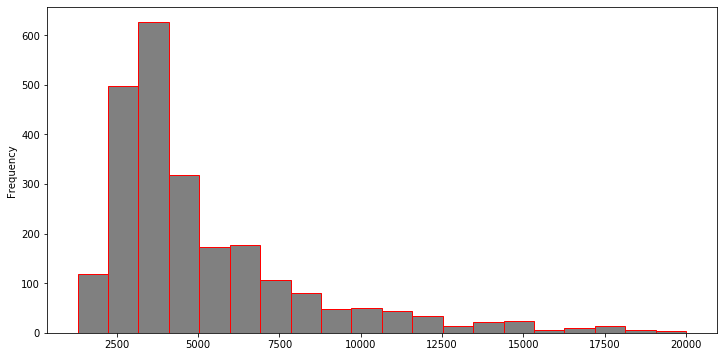

In [25]:
y_train.plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='red')
# The histogram shows the data is positive sckewed to the right with a median value of 5101.468552 rent in manhattan

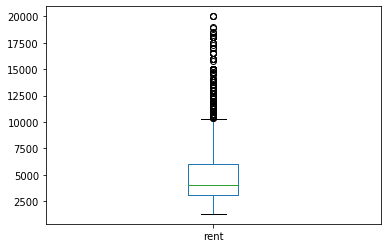

In [26]:
y_train.plot.box() # after 10k we have lots of outliers

In [27]:
y_train.describe() # the max rent price is 20k how expensive!

count     2365.000000
mean      5114.189852
std       3094.702791
min       1300.000000
25%       3100.000000
50%       4000.000000
75%       6000.000000
max      20000.000000
Name: rent, dtype: float64

### Step 4: Selected two of the following supervised learning algorithms, ideally one from the first half of the list and one from the second half of the list 

In [28]:
#Decision Tree Regressor using default parameters
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(X_train_cleaned, y_train)

In [29]:
print("Test set R^2: {:.2f}".format(tree.score(X_test_cleaned, y_test)))
print("Test set RMSE: {:.2f}".format(mean_squared_error(y_test, tree.predict(X_test_cleaned))))
print("Test set MAE: {:.2f}".format(mean_absolute_error(y_test, tree.predict(X_test_cleaned))))

Test set R^2: 0.68
Test set RMSE: 3489347.54
Test set MAE: 1019.08


In [30]:
#lasso regresssion using default parameters
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train_cleaned, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train_cleaned, y_train)))
print("Test set R^2: {:.2f}".format(lasso.score(X_test_cleaned, y_test)))
print("Test set RMSE: {:.2f}".format(mean_squared_error(y_test, lasso.predict(X_test_cleaned))))
print("Test set MAE: {:.2f}".format(mean_absolute_error(y_test, lasso.predict(X_test_cleaned))))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.82
Test set R^2: 0.82
Test set RMSE: 2010698.72
Test set MAE: 876.97
Number of features used: 38


### Step 5: For each of your selected models:

Run with the default parameters using cross-validation
Calculate precision, recall, and F1 for classification
Calculate r2, RMSE, and MAE for regression
(Where possible) adjust 2-3 parameters for each model
Report evaluation metrics for the best and worst-performing parameter settings

## Decision Tree Regression

### Grid Search for Decision Tree 

In [31]:
# REFERENCES: https://medium.com/analytics-vidhya/hyperparameters-80cb4f442e5
from sklearn.model_selection import GridSearchCV

max_depth = np.array([2,4,6,8,10,12])

model = DecisionTreeRegressor()
grid = GridSearchCV(estimator=model, param_grid=dict(max_depth=max_depth))

grid.fit(X_train_cleaned, y_train)

print("Best Max_depth: ",grid.best_estimator_.max_depth)
print("Best Score R2: {:.2f}".format(grid.best_score_))
print("Best parameter: ", grid.best_params_)

Best Max_depth:  4
Best Score R2: 0.75
Best parameter:  {'max_depth': 4}


In [32]:
# Desicion Tree using the best parameter
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=4).fit(X_train_cleaned, y_train)

print("Test set R^2: {:.2f}".format(tree.score(X_test_cleaned, y_test)))
print("Test set RMSE: {:.2f}".format(mean_squared_error(y_test, tree.predict(X_test_cleaned))))
print("Test set MAE: {:.2f}".format(mean_absolute_error(y_test, tree.predict(X_test_cleaned))))

Test set R^2: 0.77
Test set RMSE: 2528602.64
Test set MAE: 1010.90


In [33]:
# Desicion Tree using the alternative parameter
tree = DecisionTreeRegressor(max_depth=3).fit(X_train_cleaned, y_train)

print("Test set R^2: {:.2f}".format(tree.score(X_test_cleaned, y_test)))
print("Test set RMSE: {:.2f}".format(mean_squared_error(y_test, tree.predict(X_test_cleaned))))
print("Test set MAE: {:.2f}".format(mean_absolute_error(y_test, tree.predict(X_test_cleaned))))

Test set R^2: 0.75
Test set RMSE: 2676758.86
Test set MAE: 1047.00


## Lasso Regression 

### Grid Search for Lasso regression

In [34]:
# REFERENCES: https://medium.com/analytics-vidhya/hyperparameters-80cb4f442e5
alphas = np.array([5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01, 0.001, 0.0001, 0 ])

model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))

grid.fit(X_train_cleaned, y_train)

print("Best alpha ",grid.best_estimator_.alpha)
print("Best Score R2: {:.2f}".format(grid.best_score_))
print("Best parameter: ", grid.best_params_)

C:\Users\kathi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kathi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\kathi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1393406759.8005877, tolerance: 1544904.249053236
  positive)
C:\Users\kathi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kathi\

Best alpha  1.0
Best Score R2: 0.81
Best parameter:  {'alpha': 1.0}


C:\Users\kathi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1491845553.0363493, tolerance: 1574048.5768011415
  positive)


In [35]:
# Lasso regression using the best parameter

lasso1 = Lasso(alpha=1.0, max_iter=1000000).fit(X_train_cleaned, y_train)
print("Training set score: {:.2f}".format(lasso1.score(X_train_cleaned, y_train)))
print("Test set R^2: {:.2f}".format(lasso1.score(X_test_cleaned, y_test)))
print("Test set RMSE: {:.2f}".format(mean_squared_error(y_test, lasso1.predict(X_test_cleaned))))
print("Test set MAE: {:.2f}".format(mean_absolute_error(y_test, lasso1.predict(X_test_cleaned))))
print("Number of features used:", np.sum(lasso1.coef_ != 0))

Training set score: 0.82
Test set R^2: 0.82
Test set RMSE: 2010698.72
Test set MAE: 876.97
Number of features used: 38


In [36]:
# Lasso regression using the alternative parameter

lasso05 = Lasso(alpha=0.5, max_iter=10000).fit(X_train_cleaned, y_train)
print("Training set score: {:.2f}".format(lasso05.score(X_train_cleaned, y_train)))
print("Test set R^2: {:.2f}".format(lasso05.score(X_test_cleaned, y_test)))
print("Test set RMSE: {:.2f}".format(mean_squared_error(y_test, lasso05.predict(X_test_cleaned))))
print("Test set MAE: {:.2f}".format(mean_absolute_error(y_test, lasso05.predict(X_test_cleaned))))
print("Number of features used:", np.sum(lasso05.coef_ != 0))

Training set score: 0.82
Test set R^2: 0.82
Test set RMSE: 2008375.57
Test set MAE: 878.76
Number of features used: 40
